In [4]:
import numpy as np
import pandas as pd
import os

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: C:\Users\geeth\Cab Analysis


In [124]:
cab_path = '/Users/geeth/Cab Analysis/Cab_Data.csv'
city_path = '/Users/geeth/Cab Analysis/City.csv'
customer_path = '/Users/geeth/Cab Analysis/Customer_ID.csv'
transaction_path = '/Users/geeth/Cab Analysis/Transaction_ID.csv'

In [125]:
cab_data = pd.read_csv(cab_path, dayfirst=True)
city_data = pd.read_csv(city_path, dayfirst=True)
customer_data = pd.read_csv(customer_path, dayfirst=True)
trans_data = pd.read_csv(transaction_path, dayfirst=True)

In [187]:
cab_data.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854


In [67]:
trans_data.head(2)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card


In [65]:
customer_data.head(2)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237


In [84]:
city_data.head(2)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"


In [199]:
customerData=pd.merge(trans_data,customer_data, on='Customer ID', how='inner')

In [200]:
customerData=pd.merge(customerData,cab_data, on='Transaction ID', how='inner' )

In [201]:
customerData.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Age_Group,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,Male,28,10813,18-30,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10351127,29290,Cash,Male,28,10813,18-30,21-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,10412921,29290,Card,Male,28,10813,18-30,23-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,10000012,27703,Card,Male,27,9237,18-30,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,10320494,27703,Card,Male,27,9237,18-30,21-04-2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192


In [135]:
missing_values = city_data.isna().sum()
print(missing_values)
na_count = (city_data == 'NA').sum().sum()
print(' NA Count is:',na_count)


City          0
Population    0
Users         0
dtype: int64
 NA Count is: 0


In [136]:
missing_values = customerData.isna().sum()
print(missing_values)
na_count = (customerData == 'NA').sum().sum()
print(na_count)

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
dtype: int64
0


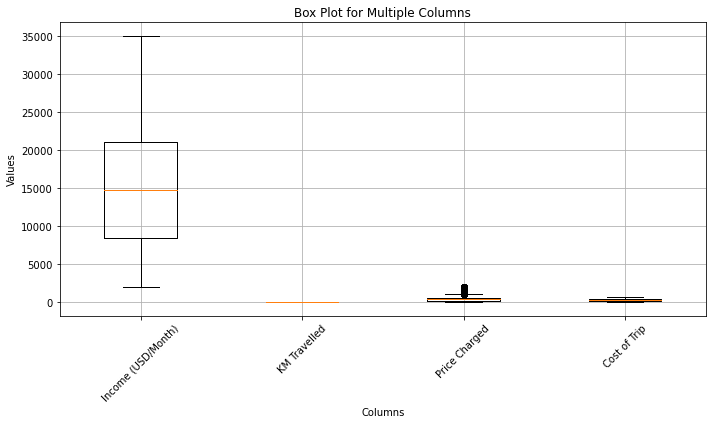

In [170]:
columns_to_plot = ['Income (USD/Month)','KM Travelled','Price Charged','Cost of Trip']

# Create a box plot for the above columns
plt.figure(figsize=(10, 6))
plt.boxplot(customerData[columns_to_plot].values, labels=columns_to_plot)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot for Multiple Columns')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


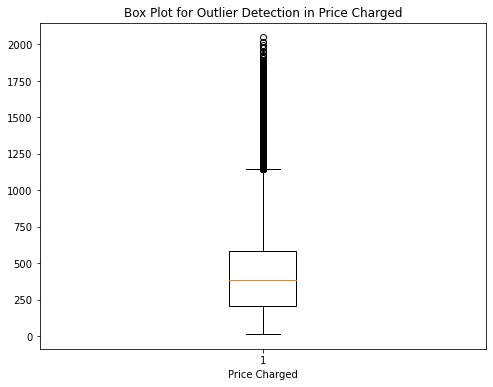

In [171]:
plt.figure(figsize=(8, 6))
plt.boxplot(customerData['Price Charged'])
plt.xlabel('Price Charged')
plt.title('Box Plot for Outlier Detection in Price Charged')
plt.show()

In [137]:
customerData_unique = customerData.drop_duplicates(subset=['City', 'Company'])

# Group the unique data by 'City' and aggregate the unique car companies
city_car_companies = cab_data_unique.groupby('City')['Company'].apply(', '.join).reset_index()

print(city_car_companies)

              City               Company
0       ATLANTA GA  Pink Cab, Yellow Cab
1        AUSTIN TX  Pink Cab, Yellow Cab
2        BOSTON MA  Pink Cab, Yellow Cab
3       CHICAGO IL  Pink Cab, Yellow Cab
4        DALLAS TX  Pink Cab, Yellow Cab
5        DENVER CO  Pink Cab, Yellow Cab
6   LOS ANGELES CA  Pink Cab, Yellow Cab
7         MIAMI FL  Pink Cab, Yellow Cab
8     NASHVILLE TN  Pink Cab, Yellow Cab
9      NEW YORK NY  Pink Cab, Yellow Cab
10   ORANGE COUNTY  Pink Cab, Yellow Cab
11      PHOENIX AZ  Pink Cab, Yellow Cab
12   PITTSBURGH PA  Pink Cab, Yellow Cab
13   SACRAMENTO CA  Pink Cab, Yellow Cab
14    SAN DIEGO CA  Pink Cab, Yellow Cab
15      SEATTLE WA  Pink Cab, Yellow Cab
16  SILICON VALLEY  Pink Cab, Yellow Cab
17       TUCSON AZ  Pink Cab, Yellow Cab
18   WASHINGTON DC  Pink Cab, Yellow Cab


In [77]:
# Group the data by 'Company' and 'City' and count the number of transactions
company_city_transactions = customerData.groupby(['Company', 'City'])['Transaction ID'].count().reset_index()

# Rename the columns for clarity
company_city_transactions.columns = ['Company', 'City', 'Transaction Count']

# Display the table
print(company_city_transactions)

       Company            City  Transaction Count
0     Pink Cab      ATLANTA GA               1762
1     Pink Cab       AUSTIN TX               1868
2     Pink Cab       BOSTON MA               5186
3     Pink Cab      CHICAGO IL               9361
4     Pink Cab       DALLAS TX               1380
5     Pink Cab       DENVER CO               1394
6     Pink Cab  LOS ANGELES CA              19865
7     Pink Cab        MIAMI FL               2002
8     Pink Cab    NASHVILLE TN               1841
9     Pink Cab     NEW YORK NY              13967
10    Pink Cab   ORANGE COUNTY               1513
11    Pink Cab      PHOENIX AZ                864
12    Pink Cab   PITTSBURGH PA                682
13    Pink Cab   SACRAMENTO CA               1334
14    Pink Cab    SAN DIEGO CA              10672
15    Pink Cab      SEATTLE WA               2732
16    Pink Cab  SILICON VALLEY               3797
17    Pink Cab       TUCSON AZ                799
18    Pink Cab   WASHINGTON DC               3692


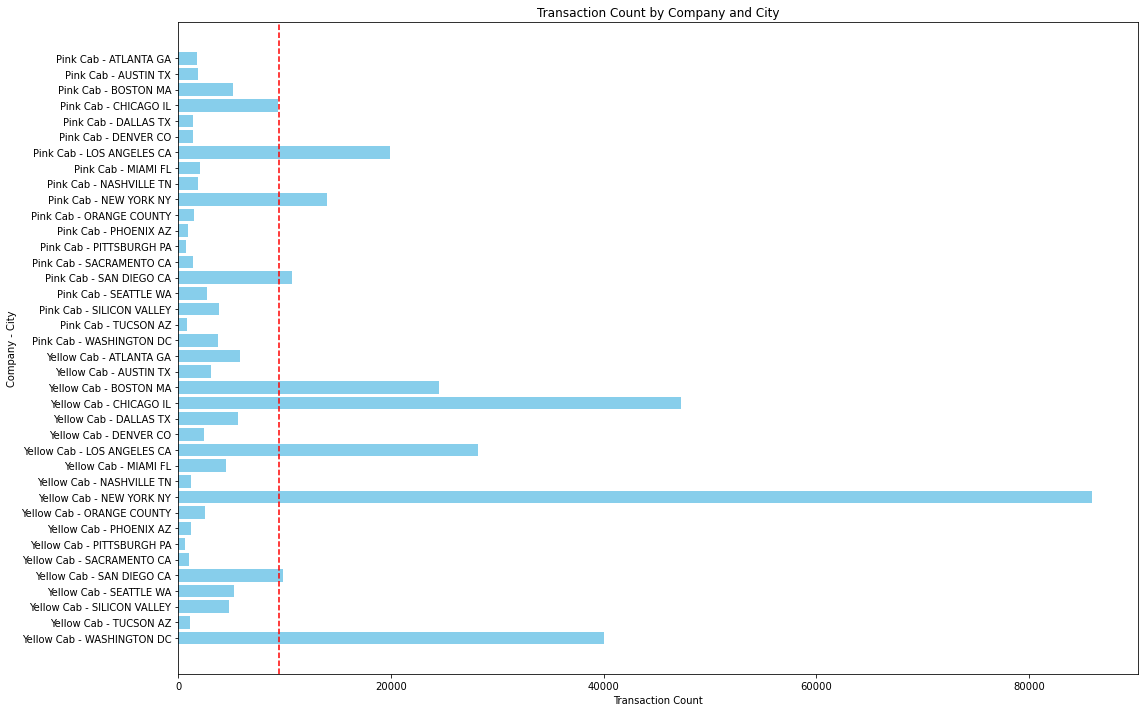

average_transaction_count 9457.684210526315


In [138]:
# Group the data by 'Company' and 'City' and count the number of transactions
company_city_transactions = customerData.groupby(['Company', 'City'])['Transaction ID'].count().reset_index()

# Rename the columns for clarity
company_city_transactions.columns = ['Company', 'City', 'Transaction Count']

average_transaction_count = company_city_transactions['Transaction Count'].mean()

# Create a bar chart
plt.figure(figsize=(16, 10))
plt.barh(company_city_transactions['Company'] + " - " + company_city_transactions['City'],
         company_city_transactions['Transaction Count'], color='skyblue')
plt.xlabel('Transaction Count')
plt.ylabel('Company - City')
plt.title('Transaction Count by Company and City')
plt.axvline(x=average_transaction_count, color='red', linestyle='--', label='Average Transaction Count')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.tight_layout()
plt.show()
print('average_transaction_count',average_transaction_count)


In [139]:
popular = company_city_transactions[company_city_transactions['Transaction Count'] > average_transaction_count]


print(popular)

       Company            City  Transaction Count
6     Pink Cab  LOS ANGELES CA              19865
9     Pink Cab     NEW YORK NY              13967
14    Pink Cab    SAN DIEGO CA              10672
21  Yellow Cab       BOSTON MA              24506
22  Yellow Cab      CHICAGO IL              47264
25  Yellow Cab  LOS ANGELES CA              28168
28  Yellow Cab     NEW YORK NY              85918
33  Yellow Cab    SAN DIEGO CA               9816
37  Yellow Cab   WASHINGTON DC              40045


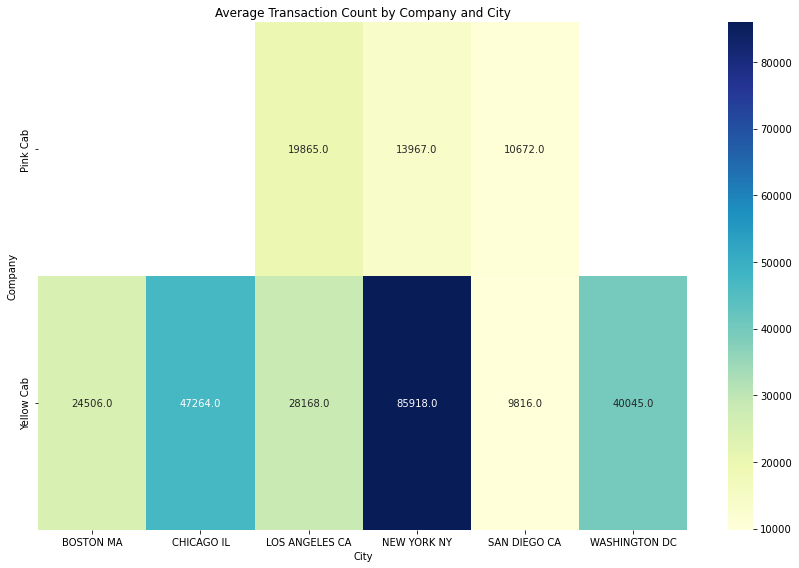

In [140]:
# Pivot the DataFrame to create a pivot table for the heatmap
pivot_table = popular.pivot_table(index='Company', columns='City', values='Transaction Count', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.xlabel('City')
plt.ylabel('Company')
plt.title('Average Transaction Count by Company and City')
plt.tight_layout()
plt.show()

In [81]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


City          0
Population    0
Users         0
dtype: int64
 NA Count is: 0


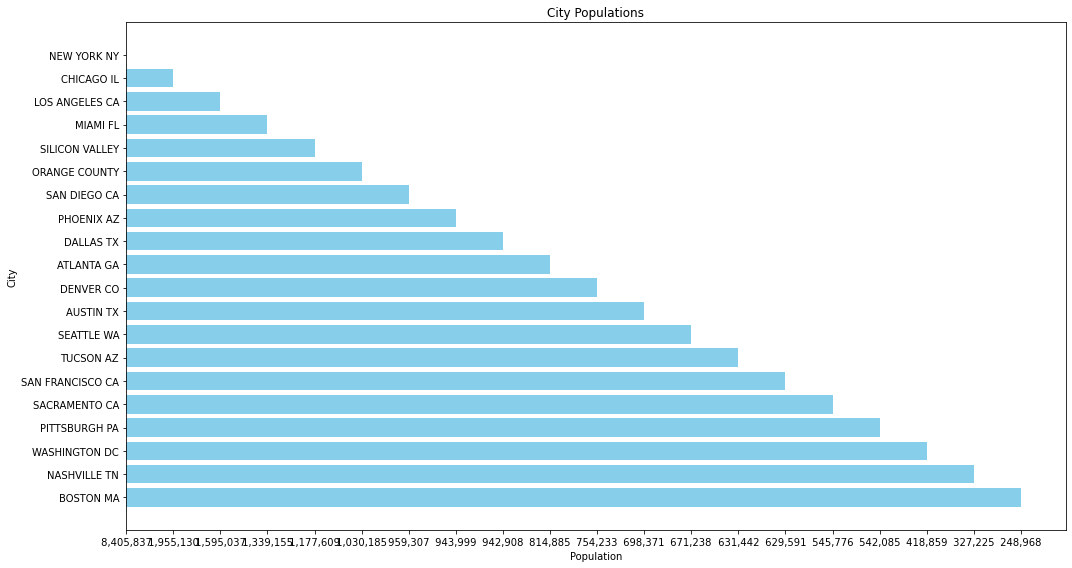

In [141]:
plt.figure(figsize=(15, 8))
plt.barh(city_data['City'], city_data['Population'], color='skyblue')
plt.xlabel('Population')
plt.ylabel('City')
plt.title('City Populations')
plt.gca().invert_yaxis()  # Invert the y-axis to have the largest city at the top
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

In [142]:
customerData.head(3)

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,Male,28,10813,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10351127,29290,Cash,Male,28,10813,21-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,10412921,29290,Card,Male,28,10813,23-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020


In [93]:
print('Max Age', customerData['Age'].max())
print('Min Age', customerData['Age'].min())

Max Age 65
Min Age 18


In [143]:
# Define the age group bins
age_bins = [18, 30, 40, 50, 65]

# Define the corresponding age group labels
age_labels = ['18-30', '31-40', '41-50', '51-65']

# Use pd.cut() to create the 'Age_Group' column
customer_data['Age_Group'] = pd.cut(customer_data['Age'], bins=age_bins, labels=age_labels, right=False)


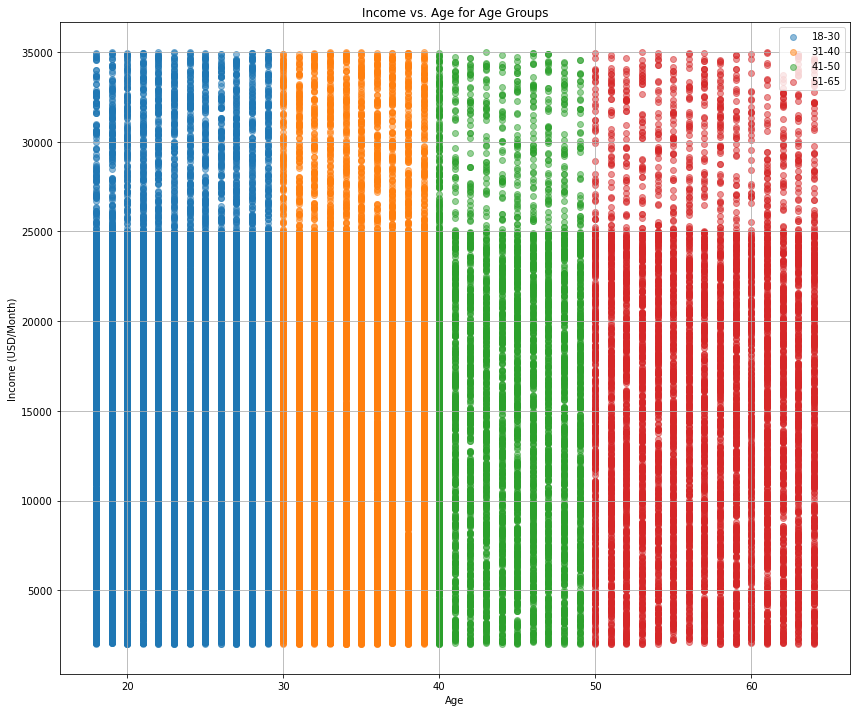

In [144]:
plt.figure(figsize=(12, 10))
for age_group in age_labels:
    age_group_data = customer_data[customer_data['Age_Group'] == age_group]
    plt.scatter(age_group_data['Age'], age_group_data['Income (USD/Month)'], label=age_group, alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Income (USD/Month)')
plt.title('Income vs. Age for Age Groups')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [145]:
age_group_counts = customer_data['Age_Group'].value_counts().sort_index()

# Print the counts for each age group
print(age_group_counts)

18-30    18909
31-40    15579
41-50     6336
51-65     7855
Name: Age_Group, dtype: int64


In [146]:
customer_data['Gender']

0          Male
1          Male
2          Male
3          Male
4          Male
          ...  
49166      Male
49167      Male
49168      Male
49169      Male
49170    Female
Name: Gender, Length: 49171, dtype: object

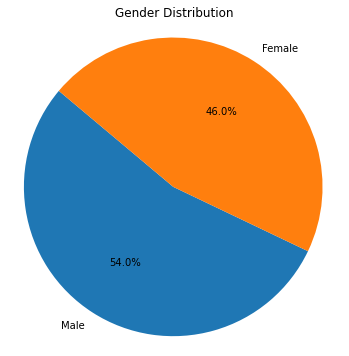

In [147]:
# Count the number of each gender (Male and Female)
gender_counts = customer_data['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Distribution')
plt.show()

In [198]:
customerData.head(3)

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Age_Group,Company,City,KM Travelled,Price Charged,Cost of Trip
Date of Travel,,,,,,,,,,,,
2016-08-01,10000011,29290,Card,Male,28,10813,18-30,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
2018-07-21,10351127,29290,Cash,Male,28,10813,18-30,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2018-11-23,10412921,29290,Card,Male,28,10813,18-30,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020


In [202]:
# Group the data by 'Company' and 'City' and count unique 'Customer ID's
customer_counts = customerData.groupby(['Company', 'City'])['Customer ID'].nunique().reset_index()

# Rename the count column for clarity
customer_counts.rename(columns={'Customer ID': 'Unique Customer Count'}, inplace=True)

# Print the resulting DataFrame
print(customer_counts)


       Company            City  Unique Customer Count
0     Pink Cab      ATLANTA GA                   1322
1     Pink Cab       AUSTIN TX                   1354
2     Pink Cab       BOSTON MA                   2463
3     Pink Cab      CHICAGO IL                   2859
4     Pink Cab       DALLAS TX                   1118
5     Pink Cab       DENVER CO                   1145
6     Pink Cab  LOS ANGELES CA                   2996
7     Pink Cab        MIAMI FL                   1480
8     Pink Cab    NASHVILLE TN                   1356
9     Pink Cab     NEW YORK NY                   2972
10    Pink Cab   ORANGE COUNTY                   1198
11    Pink Cab      PHOENIX AZ                    763
12    Pink Cab   PITTSBURGH PA                    604
13    Pink Cab   SACRAMENTO CA                   1078
14    Pink Cab    SAN DIEGO CA                   2909
15    Pink Cab      SEATTLE WA                   1790
16    Pink Cab  SILICON VALLEY                   2130
17    Pink Cab       TUCSON 

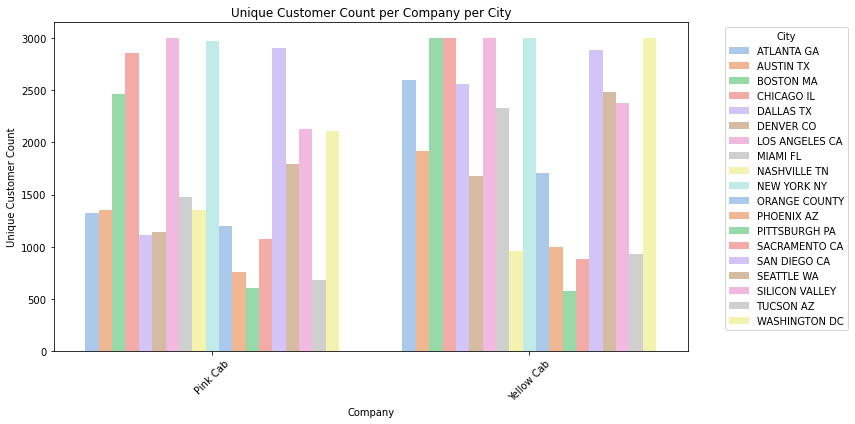

In [197]:
# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=customer_counts, x='Company', y='Unique Customer Count', hue='City', palette='pastel')
plt.xlabel('Company')
plt.ylabel('Unique Customer Count')
plt.title('Unique Customer Count per Company per City')
plt.xticks(rotation=45)

# Adjust the legend's position to the right of the plot
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [203]:
# Convert the 'Date of Travel' column to a datetime data type (if not already)
#customerData['Date of Travel'] = pd.to_datetime(customerData['Date of Travel'])

# Set 'Date of Travel' as the index
customerData.set_index('Date of Travel', inplace=True)

# Group the data by date and count the number of cab users
daily_user_counts = customerData.resample('D').count()['Customer ID']

# Create a time series plot
plt.figure(figsize=(12, 6))
daily_user_counts.plot(marker='o', linestyle='-', legend=False)
plt.xlabel('Date')
plt.ylabel('Number of Cab Users')
plt.title('Number of Cab Users Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [179]:
# Calculate profit as the difference between 'Price Charged' and 'Cost of Trip'
customerData['Profit'] = customerData['Price Charged'] - customerData['Cost of Trip']
customerData.head(2)

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
Date of Travel,,,,,,,,,,,,
2016-08-01,10000011,29290,Card,Male,28,10813,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
2018-07-21,10351127,29290,Cash,Male,28,10813,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772


In [186]:
# Filter the data for the "Pink Cab" company
pink_cab_data = customerData[customerData['Company'] == 'Pink Cab']

# Convert the 'Date of Travel' column to a datetime data type (if not already)
pink_cab_data['Date of Travel'] = pd.to_datetime(pink_cab_data['Date of Travel'])

# Group the filtered data by 'Date of Travel' and sum the 'Profit' for each date
daily_profit = pink_cab_data.groupby(pink_cab_data['Date of Travel'].dt.date)['Profit'].sum()

# Create a time series plot for profit growth over time for the "Pink Cab" company
plt.figure(figsize=(12, 6))
plt.plot(daily_profit.index, daily_profit.values, marker='o', linestyle='-')
plt.xlabel('Date of Travel')
plt.ylabel('Total Profit')
plt.title('Profit Growth Over Time for Pink Cab')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



KeyError: 'Date of Travel'

In [ ]:
# Group the data by 'Company' and 'City', and sum the 'Profit' for each group
profit_by_city_company = customerData.groupby(['Company', 'City'])['Profit'].sum().reset_index()

# Rename the 'Profit' column for clarity
profit_by_city_company.rename(columns={'Profit': 'Total Profit'}, inplace=True)

# Display the total profit by company and city
print(profit_by_city_company)